In [1]:
import matplotlib.pyplot as plt
import numpy
from reference_tools import equation_coefficients
from rayleigh_diagnostics import Point_Probes

In [2]:
def check_balance(pp, ivar, imvar, exvar):
    times = pp.time
    dt = times[2:] - times[1:-1]
    dt_old = times[1:-1] - times[:-2]

    # Compute the LHS  (df/dt)
    vshape = pp.vals.shape
    d1 = vshape[0]
    d2 = vshape[1]
    d3 = vshape[2]
    d4 = vshape[4]
    
    the_var = numpy.zeros((d1,d2,d3,d4),dtype='d')
    
    the_var[:,:,:,:] = pp.vals[:, :, :, pp.lut[ivar],:]
    dvar = the_var[:,:,:,2:] - the_var[:,:,:,1:-1]
    lhs = dvar/dt
    
    
    
    f_exp= numpy.zeros((d1,d2,d3,d4),dtype='d')
    f_imp = 0*f_exp
    
    for i in imvar:
        print('imvar: ',i)
        if (i > 0):
            f_imp += pp.vals[:,:,:,pp.lut[i],:]
        else:
            f_imp += -pp.vals[:,:,:,pp.lut[-i],:]
            
    for i in exvar:
        print('exvar: ',i)
        if (i > 0):
            f_exp += pp.vals[:,:,:,pp.lut[i],:]
        else:
            f_exp += -pp.vals[:,:,:,pp.lut[-i],:]
            

    rhs = 0.5*(f_imp[:,:,:,2:] + f_imp[:,:,:,1:-1]) + f_exp[:,:,:,1:-1] 
    rhs += 0.5*(dt/dt_old)*(f_exp[:,:,:,1:-1] - f_exp[:,:,:,:-2])
    return lhs, rhs

In [3]:
pp = Point_Probes('00101000', path='/nobackup/lmatilsk/benchmarks/c2001_case0/00_test_equations_1k_iter/Point_Probes/')

In [4]:
iphi = 5 # phi
itheta = 2 # theta


##############################
# Heat codes
te = 701
adv_heat = -1401
ref_adv_heat = -1479
cond_heating = 1421
int_heating = 1434
visc_heating = 1435
#joule_heating = 1436

exvar_heat = [adv_heat, int_heating,visc_heating]#, joule_heating]
imvar_heat = [cond_heating, ref_adv_heat]
ivar_heat = te

##############################
# Momentum codes (radial)
rhovr = 201
advr = -1201
corr = 1219
viscr = 1228
pressr = 1237
grav = 1216
#lorentz = 1248

exvar_momr = [advr,corr]#,lorentz]
imvar_momr = [viscr,pressr,grav]
ivar_momr = rhovr

imvar:  1228
imvar:  1237
imvar:  1216
exvar:  -1201
exvar:  1219
18


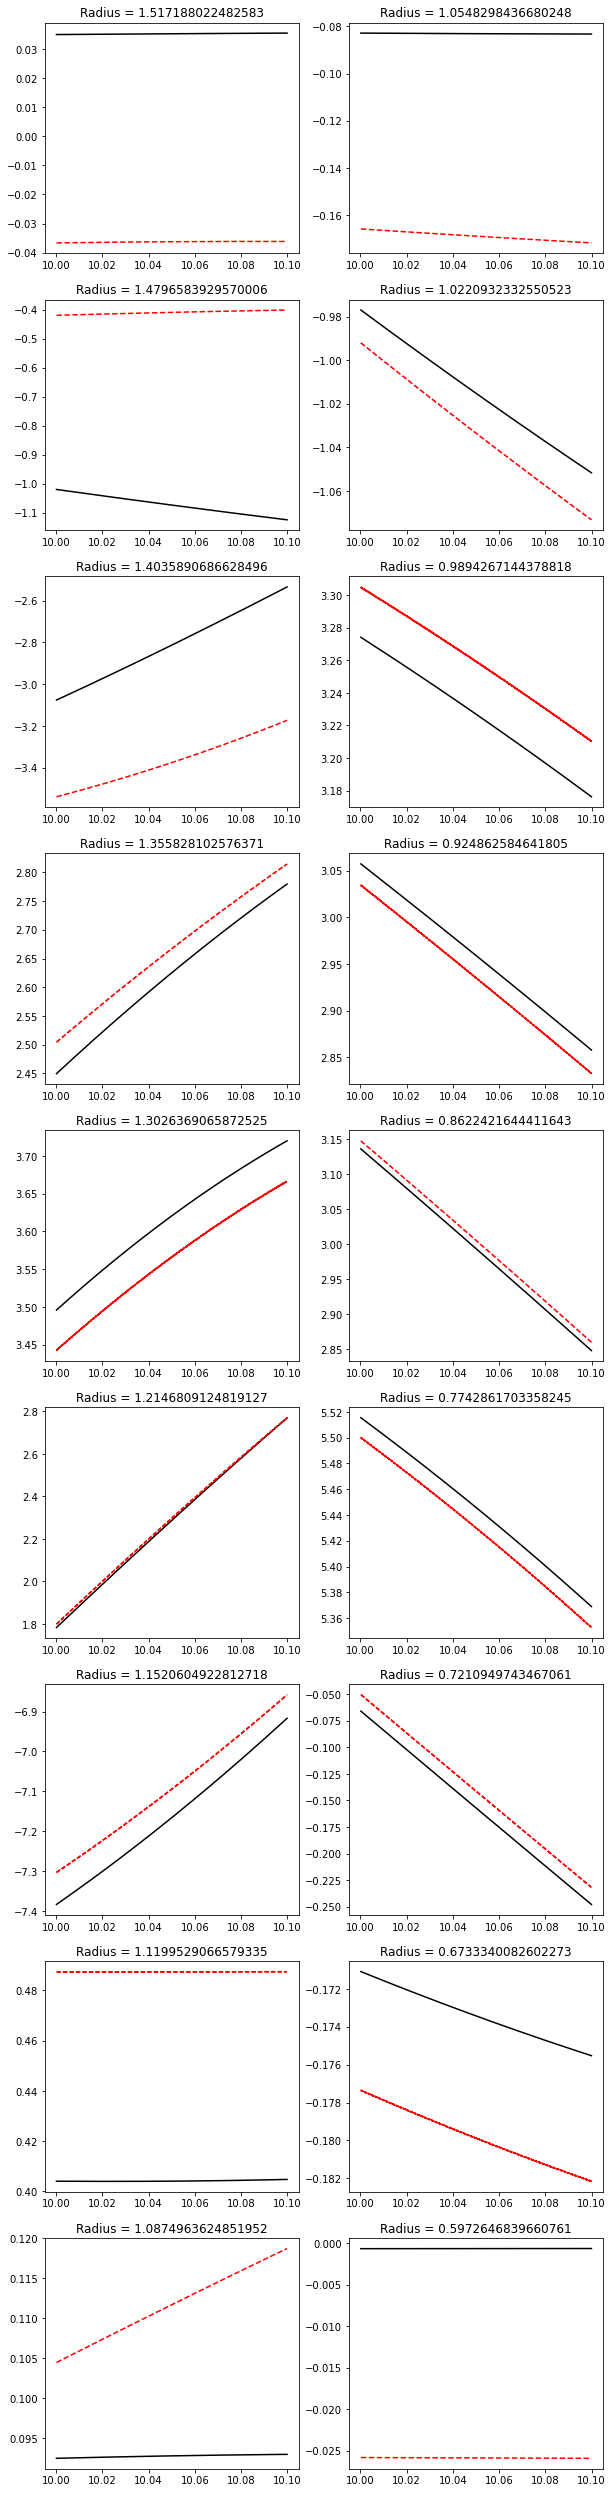

In [8]:
# plot mom (r) eq

exvar= exvar_momr
imvar= imvar_momr
ivar = ivar_momr

lhs, rhs = check_balance(pp, ivar, imvar, exvar)


ncol = 2
nrow = pp.nr//ncol

print(ncol*nrow)
k = 0
fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize = (10,5*nrow))
for i in range(ncol):
    for j in range(nrow):
        

        ax[j][i].plot(pp.time[2:], lhs[i,j,k,:], 'k', label='d [INTE] /dt (numderiv)')
        ax[j][i].plot(pp.time[2:], rhs[i,j,k,:], 'r--', label='weighted RHS')
        ax[j][i].set_title('Radius = '+str(pp.radius[k]))
        k += 1
plt.show()

imvar:  1421
imvar:  -1479
exvar:  -1401
exvar:  1434
exvar:  1435
18


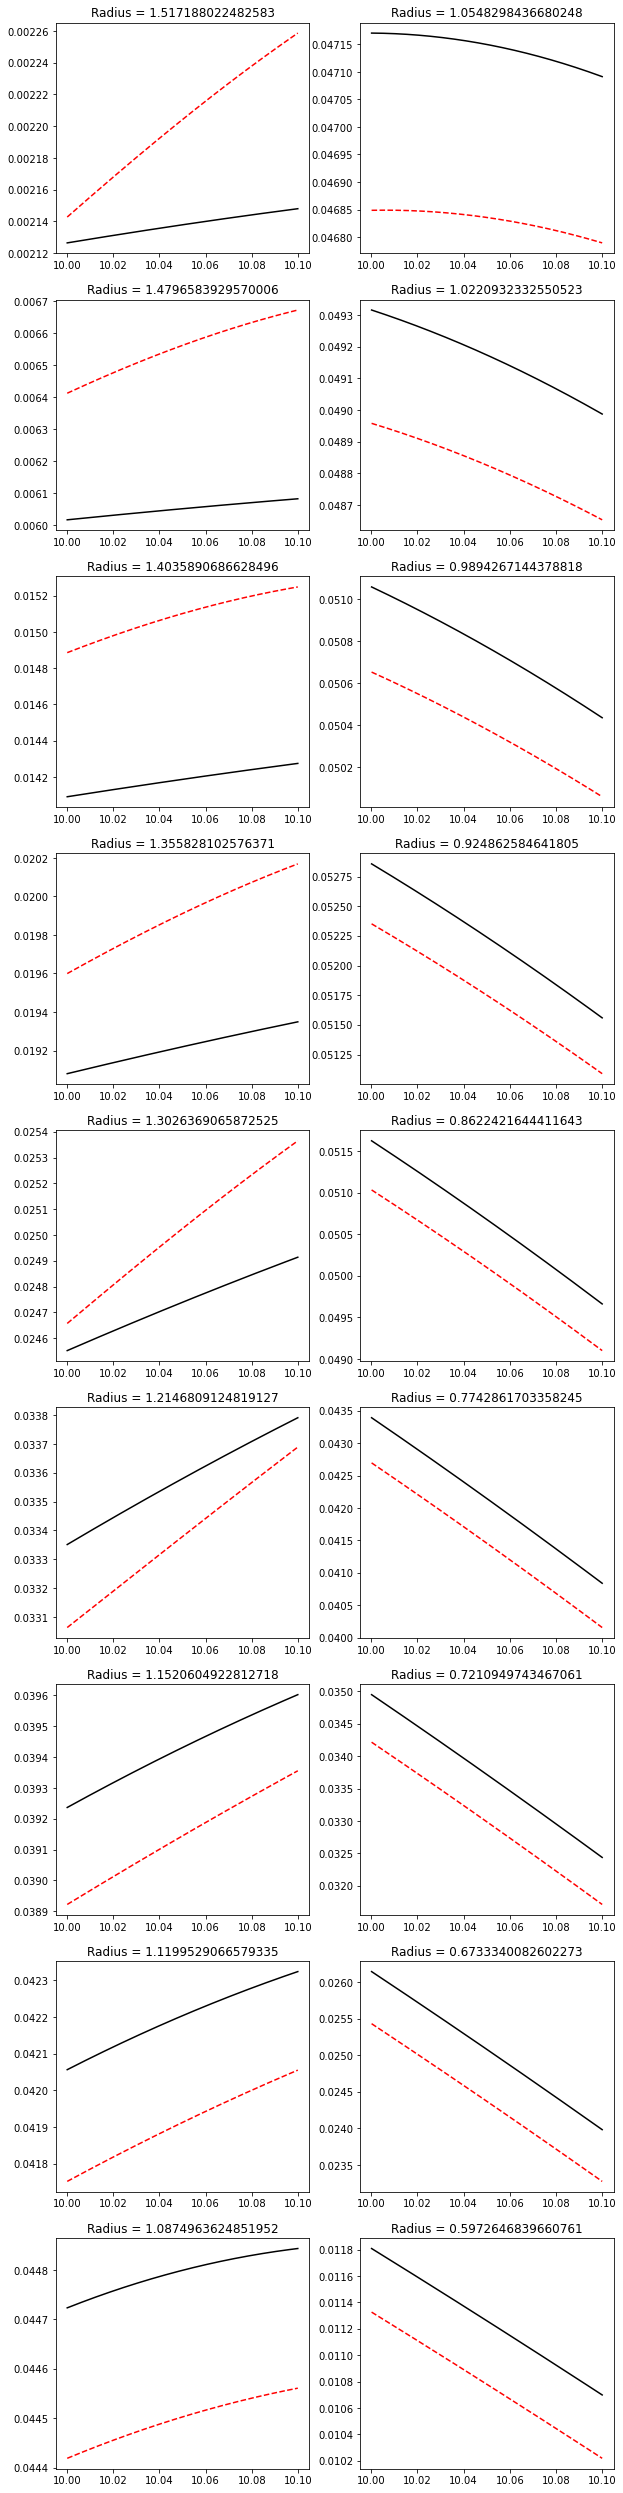

In [9]:
# plot heat eq

exvar= exvar_heat
imvar= imvar_heat
ivar = ivar_heat

lhs, rhs = check_balance(pp, ivar, imvar, exvar)


ncol = 2
nrow = pp.nr//ncol

print(ncol*nrow)
ir = 0
fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize = (10,5*nrow))
for i in range(ncol):
    for j in range(nrow):
        

        ax[j][i].plot(pp.time[2:], lhs[iphi, itheta, ir,:], 'k', label='d [INTE] /dt (numderiv)')
        ax[j][i].plot(pp.time[2:], rhs[iphi, itheta, ir,:], 'r--', label='weighted RHS')
        ax[j][i].set_title('Radius = '+str(pp.radius[ir]))
        ir += 1
plt.show()